# MIDTERM CS370 

## PROBLEM SET 1: BAYESIAN LEARNING AND INFERENCE (TAKE HOME PROBLEM)

### PS1.1: Learning the bent coin experiment (15 points)

Consider a bent coin that has a probability of 0.7 of landing heads and a probability of 0.3 of landing tails. The coin is flipped m times. The sequence of heads and tails is recorded / observed and a hypothetical receiver needs to estimate the probability of heads from the experimental data.


####  PS1.1-1 (2.5 points)

What is the entropy in bits of the bent coin? Explain why its < 1 bits. 



PS1.1-1 Answer:

Probablity of landing head : P(H) = 0.7 

Probability of landing tails : P(T) = 0.3 

"m" : Number of times the Coin was flipped. 

So, here’s how I tackled it:

The entropy of H of a random variable can be calculated with this formula:
H(X) = -(0.7log2 0.7 + 0.3 log2 0.3) which gives us .881 bits. 
The reason this value is less than 1 bit is because the outcome of the coin flips are not equally likely. Since the probablity of getting heads is higher, 0.7, than tails, (0.3), which is why the results is bound to have a lower entropy than that of a fair coin and in that case it would be exactly 1 bit. 


#### PS1.1-2 (2.5 points)

Plot the entropy of the sequence of heads and tails as m increases for m=1 to m=500 in steps of 50?

In [9]:
!pip install numpy
!pip install matplotlib
!pip install scipy

     ---------------------------------------- 0.0/60.4 kB ? eta -:--:--
     --------------------------------- ------ 51.2/60.4 kB 1.3 MB/s eta 0:00:01
     ---------------------------------------- 60.4/60.4 kB 1.1 MB/s eta 0:00:00
   ---------------------------------------- 0.0/45.8 MB ? eta -:--:--
   ---------------------------------------- 0.5/45.8 MB 14.2 MB/s eta 0:00:04
   - -------------------------------------- 1.5/45.8 MB 15.7 MB/s eta 0:00:03
   -- ------------------------------------- 3.0/45.8 MB 23.8 MB/s eta 0:00:02
   ---- ----------------------------------- 5.2/45.8 MB 29.9 MB/s eta 0:00:02
   ------ --------------------------------- 7.7/45.8 MB 37.7 MB/s eta 0:00:02
   -------- ------------------------------- 10.2/45.8 MB 43.5 MB/s eta 0:00:01
   ----------- ---------------------------- 12.8/45.8 MB 65.6 MB/s eta 0:00:01
   ------------- -------------------------- 15.5/45.8 MB 73.1 MB/s eta 0:00:01
   --------------- ------------------------ 18.2/45.8 MB 81.8 MB/s eta 

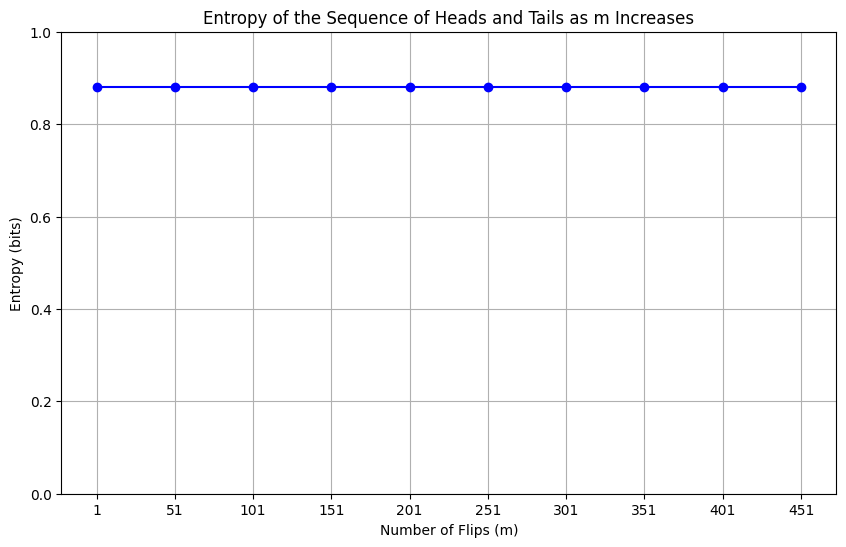

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import math

# Probability values for heads and tails
p_head = 0.7
p_tail = 0.3

# Calculate the entropy
entropy = -(p_head * math.log2(p_head) + p_tail * math.log2(p_tail))

# Define the range of m values from 1 to 500 in steps of 50
m_values = np.arange(1, 501, 50)

# Since entropy is not dependent on m, it will be constant
entropy_values = [entropy] * len(m_values)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(m_values, entropy_values, marker='o', linestyle='-', color='blue')
plt.title('Entropy of the Sequence of Heads and Tails as m Increases')
plt.xlabel('Number of Flips (m)')
plt.ylabel('Entropy (bits)')
plt.grid(True)
plt.xticks(m_values)
plt.ylim(0, 1)  # Entropy range for clarity
plt.show()


#### PS1.1-3 (10 points)

The receiver is given the sequence of heads and tails and must use the Bayes rule to estimate the probability of heads. As a parenthesis, if we know this parameter then we we can infer / predict the next binary event but this is not the focus here. 

The prior probability distribution is assumed to be beta and to solve this problem, you need to review the similar example presented in your AIMA textbook (Section 20.2.5) titled "Bayesian Parameter Learning". You are asked to estimate and plot the **mean of the posterior probability distribution** of the probability of heads as a function of the probability of heads given the sequence of heads and tails where m=[0,1, 2, 3, 4, 5, 10, 20, 50, 100]. 

You can use the scipy.stats library to help you out. To get full points you need to document extensively your code and explain the results. Note that you have to produce except from the 10 plots, a table with the mean and variance where the columns will be $m$, mean, var.



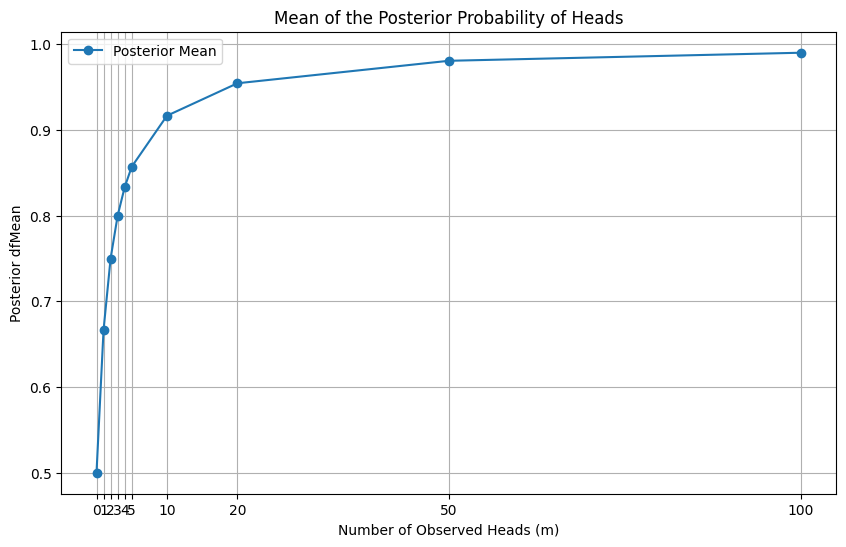

m, Mean, Variance
0, 0.5000, 0.0833
1, 0.6667, 0.0556
2, 0.7500, 0.0375
3, 0.8000, 0.0267
4, 0.8333, 0.0198
5, 0.8571, 0.0153
10, 0.9167, 0.0059
20, 0.9545, 0.0019
50, 0.9808, 0.0004
100, 0.9902, 0.0001


In [13]:
import numpy as np
from scipy.stats import beta
import matplotlib.pyplot as plt
import math

# Define the range of observed heads m
m_values = [0, 1, 2, 3, 4, 5, 10, 20, 50, 100]

# Initialize lists for storing the results
means = []
variances = []

# Starting with a uniform prior for Beta distribution
alpha_prior = 1
beta_prior = 1

# Iterate over each value of m to update the posterior and calculate mean and variance
for m in m_values:
    # Update alpha with the count of observed heads (assuming all observations are heads for simplicity)
    alpha_posterior = alpha_prior + m
    # Beta remains unchanged as we assume no tails observed
    beta_posterior = beta_prior

    # Calculate the mean and variance of the posterior Beta distribution
    mean_posterior = beta.mean(alpha_posterior, beta_posterior)
    variance_posterior = beta.var(alpha_posterior, beta_posterior)

    # Append the calculated mean and variance to the lists
    means.append(mean_posterior)
    variances.append(variance_posterior)

# Plotting the mean of the posterior distribution
plt.figure(figsize=(10, 6))
plt.plot(m_values, means, 'o-', label='Posterior Mean')
plt.title('Mean of the Posterior Probability of Heads')
plt.xlabel('Number of Observed Heads (m)')
plt.ylabel('Posterior dfMean')
plt.xticks(m_values)
plt.grid(True)
plt.legend()
plt.show()

# Printing the table of m values, means, and variances
print("m, Mean, Variance")
for m, mean, variance in zip(m_values, means, variances):
    print(f"{m}, {mean:.4f}, {variance:.4f}")


### PS1.2 Bayesian Linear Regression (15 points)

#### PS1.2-1 Dataset (2.5 points)

Generate a dataset of $m$ data points identical to the example of Figure 4.1 in GERON but modify the code such that you can produce results for the very small (eg 3 data points), low $m$ (eg 10 data points) and larger $m$ (eg 100 data points) cases. 

In [ ]:
import numpy as np

np.random.seed(42)  # to make this code example reproducible
m = 100  # number of instances
X = 2 * np.random.rand(m, 1)  # column vector
y = 4 + 3 * X + np.random.randn(m, 1)  # column vector

#### PS1.2-2 Bayesian  Regression  (12.5 points)

To solve this problem, you need to review the similar example presented in your AIMA textbook (Section 20.2.6) titled "Bayesian Linear Regression". You can also look at the code [here](https://github.com/pantelis-classes/PRML/blob/master/prml/linear/_bayesian_regression.py). 

Replicate the the Figure 20.7 (a) and (b) shown below. You dont have to replicate the exact examples but you have to generate two figures. The first should show the predictive distribution for the case of small data (sparsity) eg $m=3$ and the second when we have more data eg $m=10$.  Confidence intervals should be shown using the exaxt same standard deviations (1-3 $\sigma$) as in the figure.

![](Fig_20_07.png)

Significant number of points will be subtracted if the code presented is not well documented and if the results are not explained. Use markdown cell and markdown to write a tutorial like treatment of the problem even if this entails copying the equations from the book.